In [14]:

import pandas as pd
idx1 = ["송중기", "김나현", "박효신"]
a1 = ['2021-01-01', '송중기', 10000]
a2 = ['2021-01-01', '김나현', 2000]
a3 = ['2021-01-02', '송중기', 20000]
a4 = ['2021-01-02', '김나현', 5000]
a5 = ['2021-01-03', '김나현', 8000]
a6 = ['2021-01-03', '송중기', 5000]
df1 = pd.DataFrame([[88,72], [78,93], [91,85]], index=idx1, columns=["국어","수학"])
df2 = df1.stack().reset_index()
df2.columns = ["이름", "과목", "점수"]
df3 = pd.DataFrame([2,3,4,5], columns = ["number"])
df4 = pd.DataFrame([a1, a2, a3, a4, a5, a6], columns=["날짜", "이름", "입금"])

df1

,국어,수학
송중기,88,72
김나현,78,93
박효신,91,85


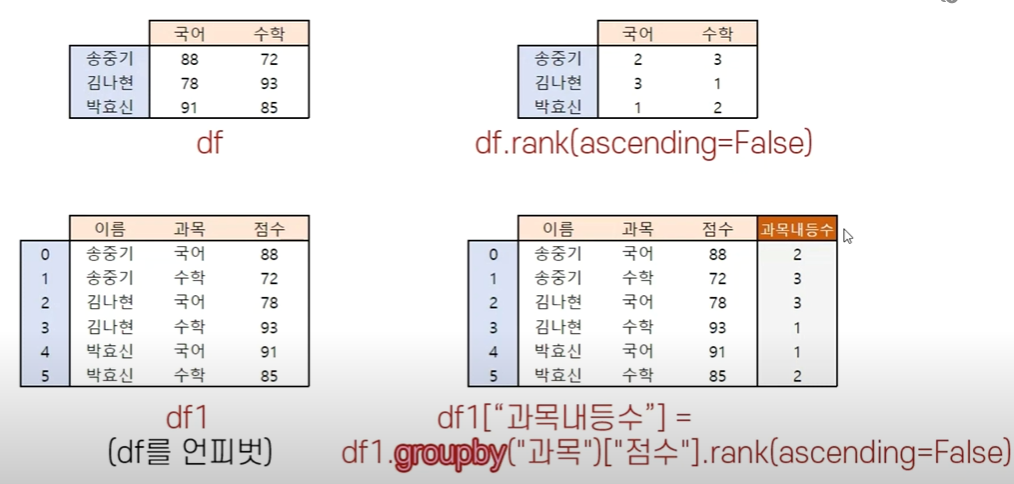

In [15]:
df1.rank(ascending=False)

,국어,수학
송중기,2.0,3.0
김나현,3.0,1.0
박효신,1.0,2.0


In [16]:
df2
# df2 = df1.stack().reset_index()

,이름,과목,점수
0,송중기,국어,88
1,송중기,수학,72
2,김나현,국어,78
3,김나현,수학,93
4,박효신,국어,91
5,박효신,수학,85


In [17]:
df2.groupby("과목")["점수"].rank(ascending=False)
# 과목 기준 점수 랭크

0    2.0
1    3.0
2    3.0
3    1.0
4    1.0
5    2.0
Name: 점수, dtype: float64

In [18]:
df2["과목내등수"] = df2.groupby("과목")["점수"].rank(ascending=False)

df2

,이름,과목,점수,과목내등수
0,송중기,국어,88,2.0
1,송중기,수학,72,3.0
2,김나현,국어,78,3.0
3,김나현,수학,93,1.0
4,박효신,국어,91,1.0
5,박효신,수학,85,2.0


In [19]:
df3

,number
0,2
1,3
2,4
3,5


In [20]:
df3["cumsum"] = df3.cumsum()
df3

# cumsum 누적 합계 함수

,number,cumsum
0,2,2
1,3,5
2,4,9
3,5,14


In [21]:
df4

,날짜,이름,입금
0,2021-01-01,송중기,10000
1,2021-01-01,김나현,2000
2,2021-01-02,송중기,20000
3,2021-01-02,김나현,5000
4,2021-01-03,김나현,8000
5,2021-01-03,송중기,5000


In [22]:
df4.groupby("이름")["입금"].cumsum()
# 이름 기준 누적 입금

0    10000
1     2000
2    30000
3     7000
4    15000
5    35000
Name: 입금, dtype: int64

In [23]:
df4["잔고"] = df4.groupby("이름")["입금"].cumsum()
df4

,날짜,이름,입금,잔고
0,2021-01-01,송중기,10000,10000
1,2021-01-01,김나현,2000,2000
2,2021-01-02,송중기,20000,30000
3,2021-01-02,김나현,5000,7000
4,2021-01-03,김나현,8000,15000
5,2021-01-03,송중기,5000,35000


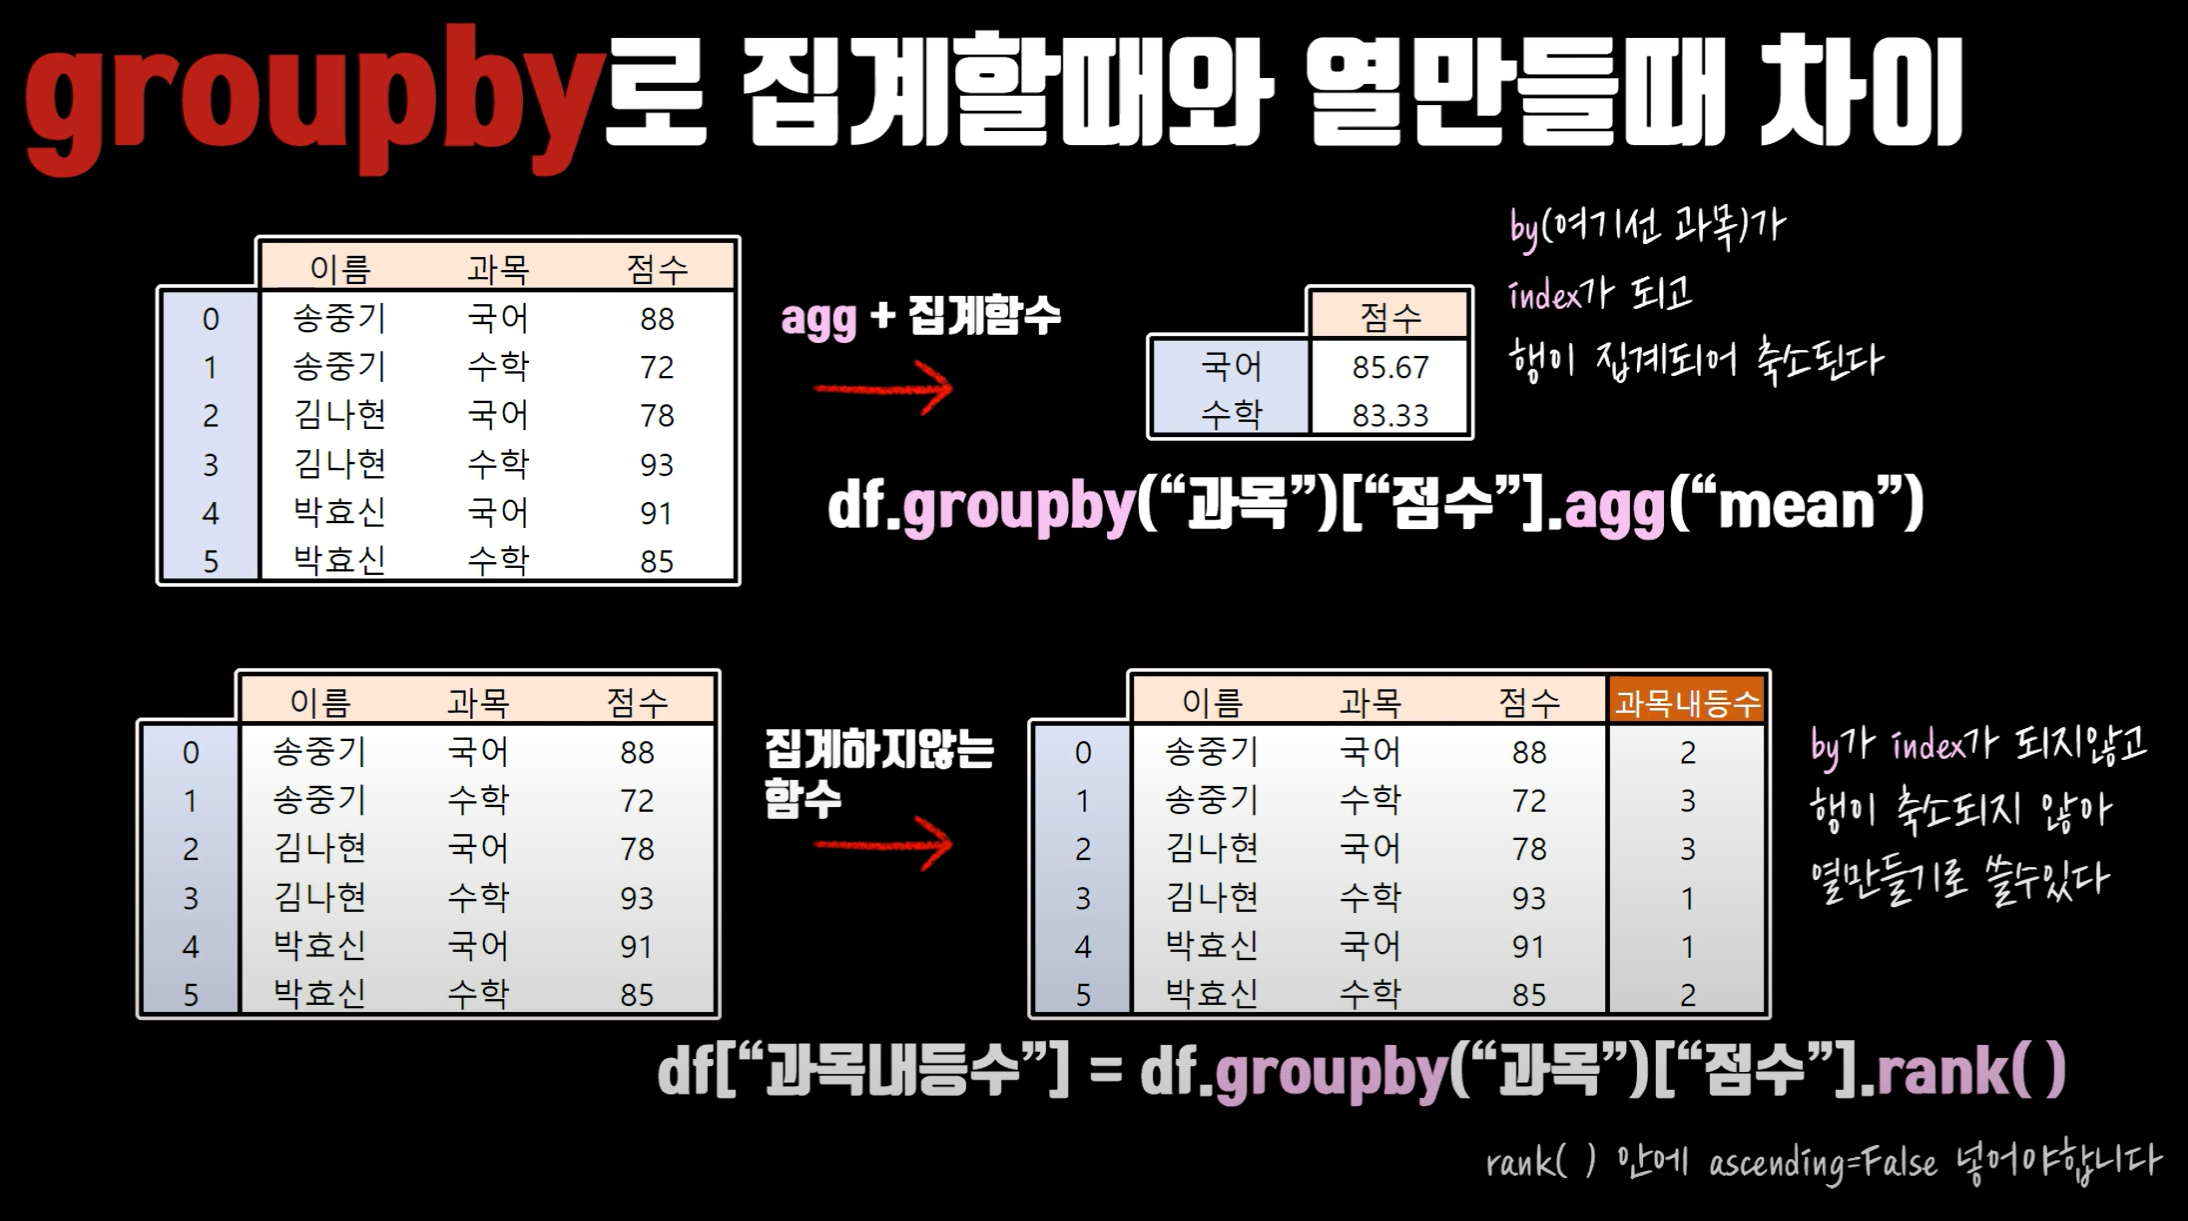